In [1]:
from project.models import Project
from public_data.models import Cerema
from django.db.models import F, Subquery, OuterRef
import geopandas
import shapely
import contextily
from matplotlib_scalebar.scalebar import ScaleBar
# import jenkspy

ign_url = (
    "https://wxs.ign.fr/ortho/geoportail/wmts?"
    "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
    "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
    "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
)

diagnostic = Project.objects.get(pk=3206)
diagnostic

<Project: Diagnostic de CA Grand Auch Coeur de Gascogne>

In [2]:
fields = Cerema.get_art_field(diagnostic.analyse_start_date, diagnostic.analyse_end_date)
sub_qs = Cerema.objects.annotate(conso=sum(F(f) for f in fields))
qs = (
    diagnostic.cities.all()
    .annotate(conso=Subquery(sub_qs.filter(city_insee=OuterRef("insee")).values("conso")[:1]) / 10000)
)
qs

<QuerySet [<Commune: Tourrenquets (32453)>, <Commune: Preignan (32331)>, <Commune: Lavardens (32204)>, <Commune: Puycasquier (32335)>, <Commune: Leboulin (32207)>, <Commune: Castelnau-Barbarens (32076)>, <Commune: Castéra-Verduzan (32083)>, <Commune: Roquefort (32347)>, <Commune: Roquelaure (32348)>, <Commune: Castillon-Massas (32089)>, <Commune: Castin (32091)>, <Commune: Sainte-Christie (32368)>, <Commune: Crastes (32112)>, <Commune: Duran (32117)>, <Commune: Mérens (32251)>, <Commune: Saint-Jean-Poutge (32382)>, <Commune: Saint-Lary (32384)>, <Commune: Mirepoix (32258)>, <Commune: Antras (32003)>, <Commune: Auch (32013)>, '...(remaining elements truncated)...']>

In [3]:
data = {"city_name": [], "consommation": [], "geometry": []}
for city in qs:
    data["city_name"].append(city.name)
    srid, wkt = city.mpoly.ewkt.split(";")
    polygons = shapely.wkt.loads(wkt)
    data["geometry"].append(polygons)
    data["consommation"].append(city.conso)
len(data["city_name"])

34

In [4]:
gdf = geopandas.GeoDataFrame(data, crs="EPSG:4326").to_crs(epsg=3857)

gdf

city_name  consommation  \
0           Tourrenquets        0.1769   
1               Preignan       11.3655   
2              Lavardens        2.4457   
3            Puycasquier        8.8505   
4               Leboulin       10.5958   
5    Castelnau-Barbarens        8.3751   
6       Castéra-Verduzan       11.3466   
7              Roquefort        1.5298   
8             Roquelaure       11.1816   
9       Castillon-Massas        2.1917   
10                Castin        4.3850   
11       Sainte-Christie       13.4999   
12               Crastes        4.6485   
13                 Duran        7.2619   
14                Mérens        1.7379   
15     Saint-Jean-Poutge        6.7122   
16            Saint-Lary        4.0438   
17              Mirepoix        3.2423   
18                Antras        1.3479   
19                  Auch       92.7586   
20                Augnax        3.9758   
21  Montaut-les-Créneaux       10.0063   
22              Auterive        8.7741   
23              Montégut        7.6068   
24            Ayguetinte        3.8027   
25                 Jegun        8.7646   
26           Nougaroulet        4.0782   
27        Ordan-Larroque        9.3365   
28                 Pavie       15.4960   
29               Lahitte        1.8840   
30                Pessan        7.1876   
31                 Biran        5.2452   
32       Peyrusse-Massas        3.3032   
33                 Bonas        0.5881   

                                             geometry  
0   MULTIPOLYGON (((75714.860 5427777.282, 75828.2...  
1   MULTIPOLYGON (((68895.039 5419894.453, 68835.5...  
2   MULTIPOLYGON (((55606.212 5424518.438, 55622.6...  
3   MULTIPOLYGON (((80580.255 5431384.579, 80621.9...  
4   MULTIPOLYGON (((72029.985 5412762.375, 72029.6...  
5   MULTIPOLYGON (((75095.139 5399573.101, 75034.8...  
6   MULTIPOLYGON (((43765.228 5436356.775, 43978.9...  
7   MULTIPOLYGON (((63276.434 5427516.783, 63295.8...  
8   MULTIPOLYGON (((63748.713 5419642.894, 63786.2...  
9   MULTIPOLYGON (((57156.075 5420102.396, 57155.2...  
10  MULTIPOLYGON (((59053.102 5415132.516, 59039.6...  
11  MULTIPOLYGON (((69859.751 5424445.352, 69824.7...  
12  MULTIPOLYGON (((77684.091 5421200.003, 77703.3...  
13  MULTIPOLYGON (((62276.321 5416768.455, 62332.8...  
14  MULTIPOLYGON (((63276.434 5427516.783, 63616.3...  
15  MULTIPOLYGON (((39684.154 5422081.115, 39733.7...  
16  MULTIPOLYGON (((52139.932 5422823.695, 52146.6...  
17  MULTIPOLYGON (((71537.201 5425527.747, 71541.0...  
18  MULTIPOLYGON (((46544.104 5424020.392, 46516.6...  
19  MULTIPOLYGON (((54346.752 5409762.830, 54365.9...  
20  MULTIPOLYGON (((85448.395 5421247.715, 85307.9...  
21  MULTIPOLYGON (((76782.681 5415159.918, 76582.2...  
22  MULTIPOLYGON (((68518.630 5399289.080, 68530.5...  
23  MULTIPOLYGON (((71396.780 5409135.871, 71342.0...  
24  MULTIPOLYGON (((45694.736 5437370.608, 45646.8...  
25  MULTIPOLYGON (((44862.414 5424092.636, 44862.1...  
26  MULTIPOLYGON (((76782.681 5415159.918, 76795.2...  
27  MULTIPOLYGON (((54346.752 5409762.830, 54214.2...  
28  MULTIPOLYGON (((67102.211 5401737.252, 66900.5...  
29  MULTIPOLYGON (((77664.813 5412455.408, 77617.9...  
30  MULTIPOLYGON (((70681.750 5402310.456, 70681.3...  
31  MULTIPOLYGON (((42440.252 5420975.238, 42525.1...  
32  MULTIPOLYGON (((61558.213 5423074.602, 61427.2...  
33  MULTIPOLYGON (((43033.613 5429336.289, 42988.3...

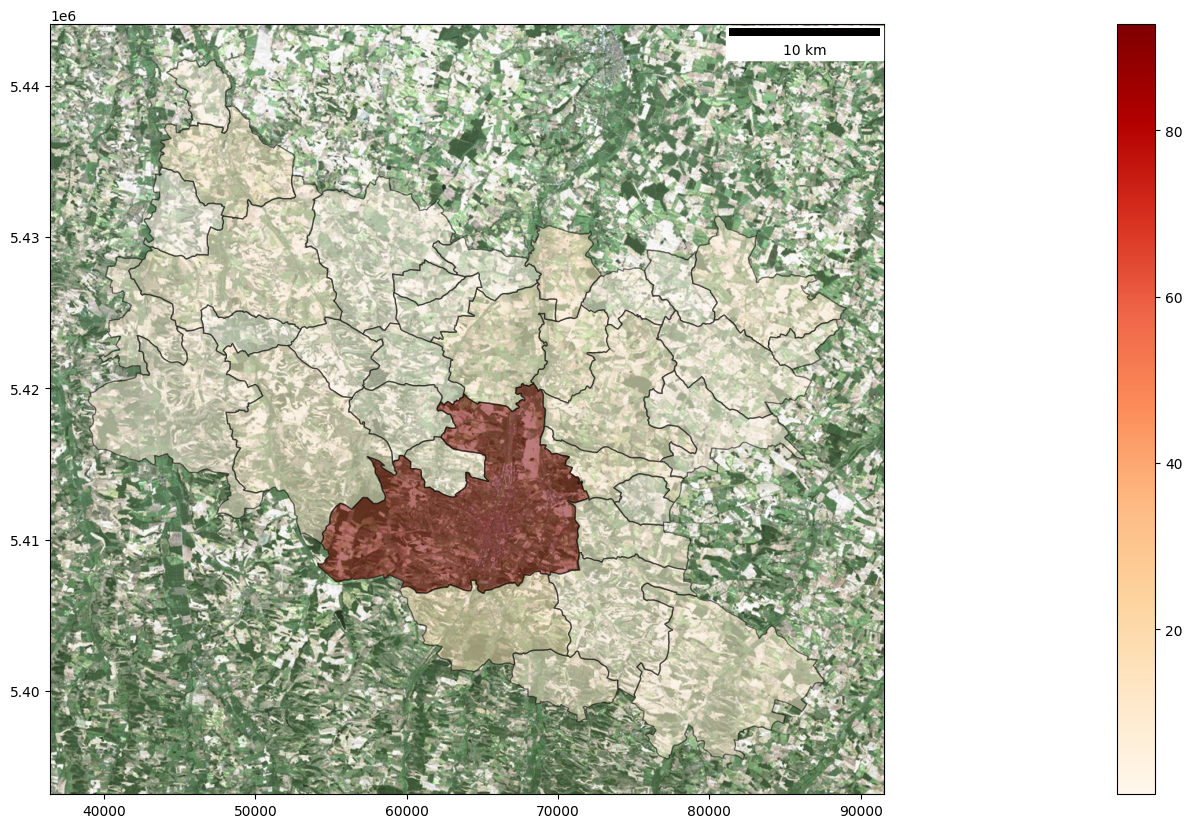

In [5]:
ax = gdf.plot("consommation", legend=True, cmap='OrRd', figsize=(60, 10), alpha=0.5, edgecolor='k')
ax.add_artist(ScaleBar(1))
contextily.add_basemap(
    ax, source=(
        "https://wxs.ign.fr/ortho/geoportail/wmts?"
        "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
        "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
        "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
    ),
)

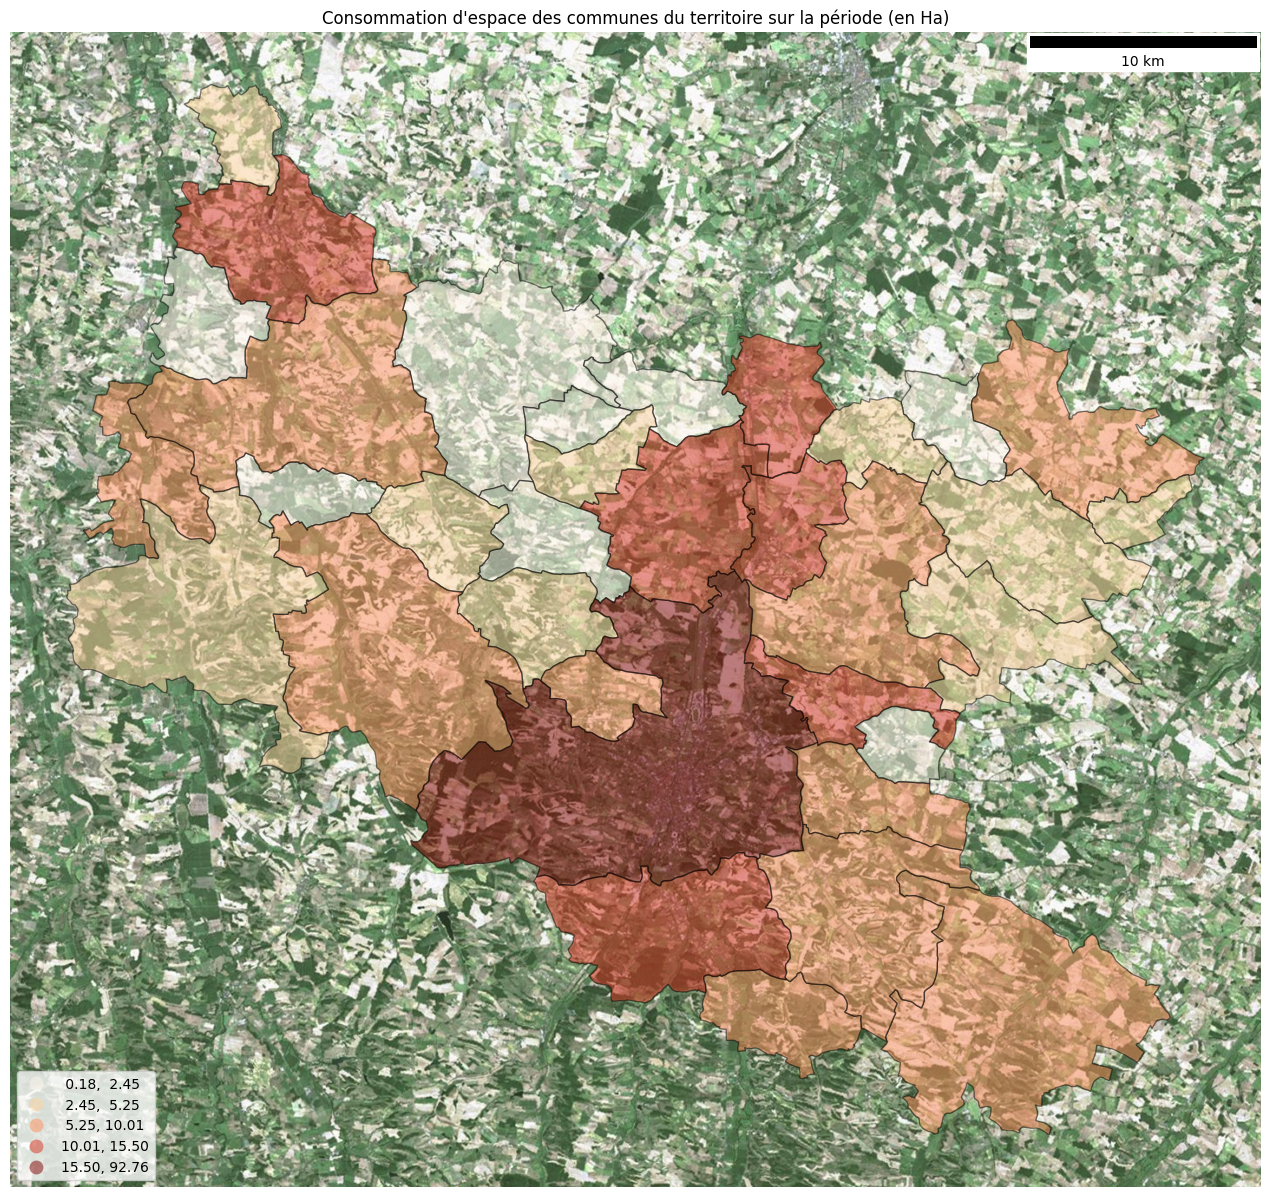

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

ax = gdf.plot(
    "consommation",
    scheme='natural_breaks',
    k=5,
    legend=True,
    cmap='OrRd',
    figsize=(30, 15),
    alpha=0.5,
    edgecolor='k',
    legend_kwds={'loc': 'lower left'},
)
ax.add_artist(ScaleBar(1))
ax.set_title("Consommation d'espace des communes du territoire sur la période (en Ha)")
ax.axis('off')
contextily.add_basemap(
    ax, source=(
        "https://wxs.ign.fr/ortho/geoportail/wmts?"
        "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
        "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
        "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
    ),
)

In [7]:
values = pd.Series([71664, 65456, 60378, 50128, 46618, 44028, 42642, 41237, 35300, 34891, 34848, 33089, 29964, 25193, 25088, 23879, 23458, 18149, 16537, 15576, 15235, 14741, 11981, 11963, 11616, 10280, 9723, 9720, 9709, 9659, 9649, 9631, 9369, 8345, 8211, 7809, 7758, 7119, 7034, 6979, 6455, 5861, 5580, 5498, 5469, 5448, 5317, 4749, 4498, 4254, 4152, 3876, 3861, 3836, 3813, 3786, 3655, 3582, 3475, 2922, 2870, 2866, 2849, 2634, 2598, 2185, 1950, 1924, 1886, 1879, 1794, 1756, 1702, 1700, 1637, 1632, 1524, 1505, 1453, 1415, 1396, 1345, 1327, 1306, 1250, 1125, 1084, 1079, 1025, 976, 920, 903, 877, 868, 842, 815, 803, 799, 799, 792, 762, 725, 718, 714, 710, 660, 654, 647, 617, 616, 611, 600, 588, 572, 572, 567, 547, 536, 522, 482, 463, 439, 434, 428, 419, 415, 412, 410, 395, 390, 389, 386, 375, 374, 370, 345, 338, 325, 324, 285, 276, 272, 250, 236, 229, 227, 226, 216, 213, 209, 203, 200, 186, 186, 182, 182, 175, 173, 170, 169, 164, 164, 159, 155, 153, 148, 147, 140, 131, 129, 127, 127, 126, 124, 119, 117, 115, 114, 111, 109, 105, 103, 101, 97, 90, 89, 89, 85, 84, 77, 76, 74, 72, 71, 70, 70, 69, 62, 61, 61, 60, 57, 54, 53, 53, 51, 50, 50, 48, 44, 43, 42, 35, 34, 30, 29, 26, 23, 20, 19, 16, 15, 15, 12, 11, 9, 8, 8, 5, 3, 1])
# values = data["consommation"]

NameError: name 'pd' is not defined

In [ ]:
num_colors = 7
bins = jenkspy.jenks_breaks(values, n_classes=num_colors - 1)
bins

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

values = data["consommation"]


# Orange-Red colormap 
cm = plt.get_cmap('OrRd')
scheme = cm(1.*np.arange(num_colors)/num_colors)
fig = plt.figure(figsize=(19, 7))
ax_legend = fig.add_axes([0.35, 0.15, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)

# Round legend ticks to nearest 100
legend_bins = np.around(bins, decimals = -2)
# Split colormap into equal intervals
legend_colors = np.linspace(min(values), max(values), num_colors)
cmap

In [ ]:
cb = mpl.colorbar.ColorbarBase(ax_legend, 
                               cmap=cmap, 
                               ticks=bins, 
                               boundaries=bins, 
                               orientation='horizontal' )
cb.set_ticks(legend_colors[1:])